In [78]:
# Do not modify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [79]:
# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [80]:
# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
34320,34321,2013,12,1,0,-13,-2.0,1026.0,0.89,0,0
34321,34322,2013,12,1,1,-14,-3.0,1025.0,3.13,0,0
34322,34323,2013,12,1,2,-13,-3.0,1025.0,0.89,0,0
34323,34324,2013,12,1,3,-13,-4.0,1025.0,0.89,0,0
34324,34325,2013,12,1,4,-13,-3.0,1025.0,1.78,0,0


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## a Linear (Polynomial) regressor

In [83]:
#select important feature
forest = RandomForestRegressor( n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
sfm = SelectFromModel(forest)
sfm.fit(X_train, y_train)
X_train_r = sfm.transform(X_train)
X_test_r = sfm.transform(X_test)

poly = PolynomialFeatures(degree=10)
poly.fit(X_train_r)
X_train_quad = poly.transform(X_train_r)
X_test_quad = poly.transform(X_test_r)


# Standardization
sc = StandardScaler()
sc.fit(X_train_quad)
X_train_std = sc.transform(X_train_quad)
X_test_std = sc.transform(X_test_quad)

#linear regression
#Training
lr = LinearRegression()
lr.fit(X_train_std, y_train)

#Testing
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' %
      (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))


MSE train: 2382.60, test: 3851.00
R^2 train: 0.85, test: 0.77


## residual plot

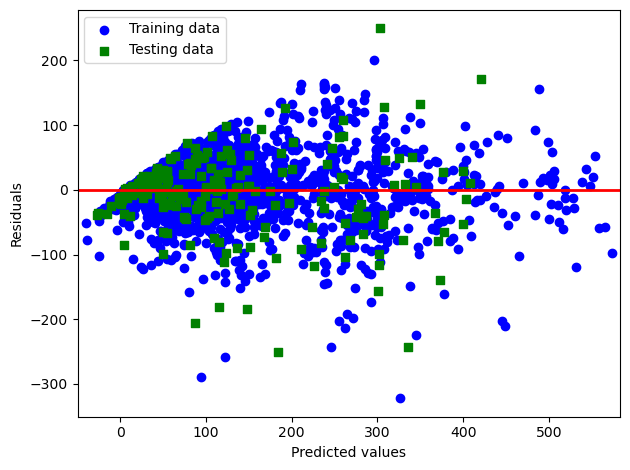

In [84]:
#plot
plt.scatter(
    y_train_pred, 
    y_train_pred - y_train,
    c='blue', marker='o', 
    label='Training data')
plt.scatter(
    y_test_pred, 
    y_test_pred - y_test,
    c='green', 
    marker='s', 
    label='Testing data')

xmin = min(y_train_pred.min(), y_test_pred.min())
xmax = max(y_train_pred.max(), y_test_pred.max())
xmin, xmax = int(xmin - 10), int(xmax + 10)
plt.hlines(y=0, xmin=xmin, xmax=xmax, lw=2, color='red')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.xlim([xmin, xmax])
plt.tight_layout()
plt.show()

## a Random Forest regressor

In [85]:
forest = RandomForestRegressor(
    n_estimators=1000, criterion='squared_error', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred), 
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' %(r2_score(y_train, y_train_pred), 
                                      r2_score(y_test, y_test_pred)))




MSE train: 161.87, test: 1287.02
R^2 train: 0.99, test: 0.92


## residual plot

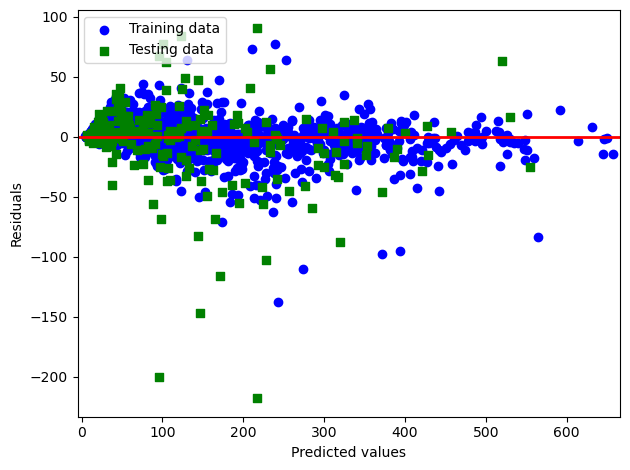

In [86]:
#plot
plt.scatter(
    y_train_pred, 
    y_train_pred - y_train,
    c='blue', marker='o', 
    label='Training data')
plt.scatter(
    y_test_pred, 
    y_test_pred - y_test,
    c='green', 
    marker='s', 
    label='Testing data')

xmin = min(y_train_pred.min(), y_test_pred.min())
xmax = max(y_train_pred.max(), y_test_pred.max())
xmin, xmax = int(xmin - 10), int(xmax + 10)
plt.hlines(y=0, xmin=xmin, xmax=xmax, lw=2, color='red')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.xlim([xmin, xmax])
plt.tight_layout()
plt.show()